# VISPAD INSTITUTE OF TECHNOLOGY
## LAB TUTORIALS 3

### SECTION 1: ORTHOGONAL PROJECTION

**Concept: Orthogonal Projection**

When we have a vector **v** and want to project it onto another vector **y**, we're finding the component of **v** that points in the direction of **y**.

Think of it like casting a shadow: if you shine a light perpendicular to vector **y**, the shadow of **v** on **y** is the orthogonal projection!


### 1.1 The Projection Formula

Given two vectors **v** and **y**, the orthogonal projection of **v** onto **y** is:

$$
\text{proj}_{\mathbf{y}}(\mathbf{v}) = \frac{\langle \mathbf{v}, \mathbf{y} \rangle}{\langle \mathbf{y}, \mathbf{y} \rangle} \mathbf{y}
$$

**💬 In simple terms:**
- Calculate the dot product of **v** and **y**
- Divide by the dot product of **y** with itself
- Multiply the result by **y**

This gives us the part of **v** that lies in the direction of **y**!

In [1]:
import numpy as np

# Function to compute dot product (from previous lab)
def dot_product(v, w):
    total = 0
    for i in range(len(v)):
        total += v[i] * w[i]
    return total

# Function to compute orthogonal projection
def project_onto(v, y):
    """
    Project vector v onto vector y
    Returns: projection vector
    """
    # Calculate <v, y>
    numerator = dot_product(v, y)
    
    # Calculate <y, y>
    denominator = dot_product(y, y)
    
    # Calculate the scalar coefficient
    scalar = numerator / denominator
    
    # Multiply scalar by y
    projection = [scalar * y[i] for i in range(len(y))]
    
    return projection

In [2]:
a = [4, -2, 1]
b = [-1, 3, 5]

def dot_product(a, b):
    total = 0
    for i in range(len(a)):
        total += a[i] * b[i]
    return total

print(dot_product(a, b))

-5


In [3]:
# Example
v = [3, 1]
y = [2, 2]

proj = project_onto(v, y)
print("Vector v:", v)
print("Vector y:", y)
print("Projection of v onto y:", proj)

Vector v: [3, 1]
Vector y: [2, 2]
Projection of v onto y: [2.0, 2.0]


In [4]:
### 1.3 Using NumPy
import numpy as np

def project_onto_numpy(v, y):
    """
    Project vector v onto vector y using NumPy
    """
    v = np.array(v)
    y = np.array(y)
    
    # proj_y(v) = (<v,y> / <y,y>) * y
    projection = (np.dot(v, y) / np.dot(y, y)) * y
    
    return projection

In [5]:
v = np.array([3, 1])
y = np.array([2, 2])

proj = project_onto_numpy(v, y)
print("Projection using NumPy:", proj)

Projection using NumPy: [2. 2.]


#### 1.4 Finding the Orthogonal Component

Once we have the projection, we can find the **orthogonal component** (the part of **v** that's perpendicular to **y**):

$$
\mathbf{v}_{\perp} = \mathbf{v} - \text{proj}_{\mathbf{y}}(\mathbf{v})
$$

In [6]:
def orthogonal_component(v, y):
    """
    Find the component of v orthogonal to y
    """
    proj = project_onto(v, y)
    
    # Subtract projection from original vector
    v_perp = [v[i] - proj[i] for i in range(len(v))]
    
    return v_perp

In [7]:
#Example
v = [3, 1]
y = [2, 2]

v_perp = orthogonal_component(v, y)
print("\nOrthogonal component:", v_perp)

# Verify: v_perp should be orthogonal to y (dot product = 0)
print("Dot product (should be ~0):", dot_product(v_perp, y))


Orthogonal component: [1.0, -1.0]
Dot product (should be ~0): 0.0


In [8]:
# 1.5 Visualizing Projection

import matplotlib.pyplot as plt
import numpy as np

def visualize_projection(v, y):
    v = np.array(v)
    y = np.array(y)
    
    # Calculate projection
    proj = (np.dot(v, y) / np.dot(y, y)) * y
    
    # Calculate orthogonal component
    v_perp = v - proj
    
    # Create plot
    plt.figure(figsize=(8, 8))
    
    # Plot vectors
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, 
               color='blue', width=0.006, label='v (original)')
    plt.quiver(0, 0, y[0], y[1], angles='xy', scale_units='xy', scale=1, 
               color='red', width=0.006, label='y (target)')
    plt.quiver(0, 0, proj[0], proj[1], angles='xy', scale_units='xy', scale=1, 
               color='green', width=0.006, label='proj_y(v)')
    plt.quiver(proj[0], proj[1], v_perp[0], v_perp[1], angles='xy', 
               scale_units='xy', scale=1, color='orange', width=0.006, 
               label='v_perp (orthogonal)')
    
    # Draw dotted line from v to projection
    plt.plot([v[0], proj[0]], [v[1], proj[1]], 'k--', alpha=0.3)
    
    plt.xlim(-1, 4)
    plt.ylim(-1, 3)
    plt.axhline(y=0, color='k', linewidth=0.5)
    plt.axvline(x=0, color='k', linewidth=0.5)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.title("Orthogonal Projection Visualization")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis('equal')
    plt.show()

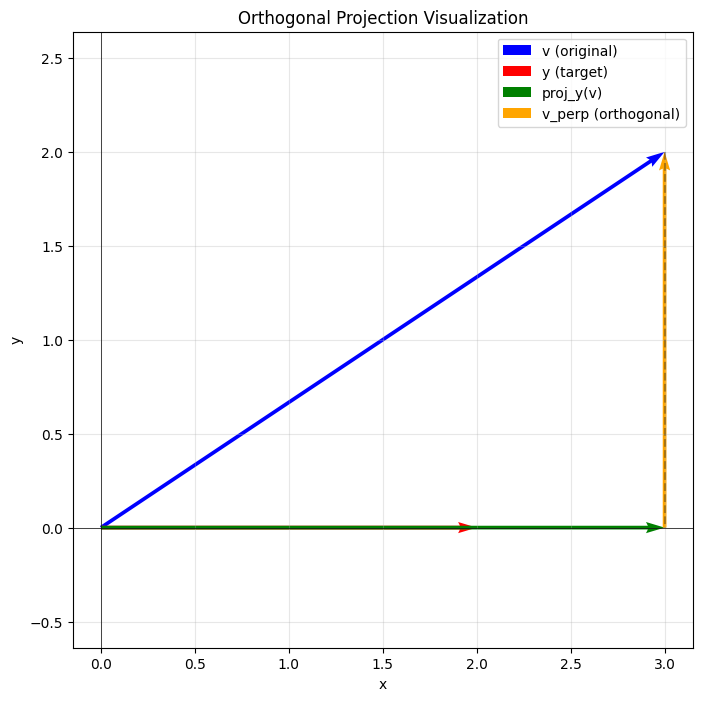

In [9]:
v = [3, 2]
y = [2, 0]
visualize_projection(v, y)

### Mini Exercise - Projection

**Exercise A:**  
Find the projection of vector **v = [1, 2]** onto **y = [3, 4]** using pure Python.

**Exercise B:**  
Verify that the orthogonal component is indeed perpendicular to **y** by checking that their dot product equals 0.

## Finding the Angle Between Vectors

By rearranging the Dotformula, we can solve for the angle $\alpha$:$$ \cos \alpha = \frac{\langle \vec{x}, \vec{y} \rangle}{||\vec{x}|| \cdot ||\vec{y}||} \quad \implies \quad \alpha = \cos^{-1}\left( \frac{\langle \vec{x}, \vec{y} \rangle}{||\vec{x}|| \cdot ||\vec{y}||} \right) $$The term inside is just our cosine_similarity function. The $\cos^{-1}$ function is math.acos().

In [10]:
def angle_between(v1, v2):
    """
    Calculates the angle (in degrees) between two vectors.
    """
    # calculate cosine similarity
    # min(max(..., -1), 1) to avoid floating point errors
    # e.g., 1.0000001, which would break math.acos()
    cos_sim = cosine_similarity(v1, v2)
    cos_sim = min(max(cos_sim, -1.0), 1.0)
    
    # 2. Calculate the angle in radians
    angle_rad = math.acos(cos_sim)
    
    # 3. Convert to degrees
    angle_deg = math.degrees(angle_rad)
    
    return angle_deg

#### Example 


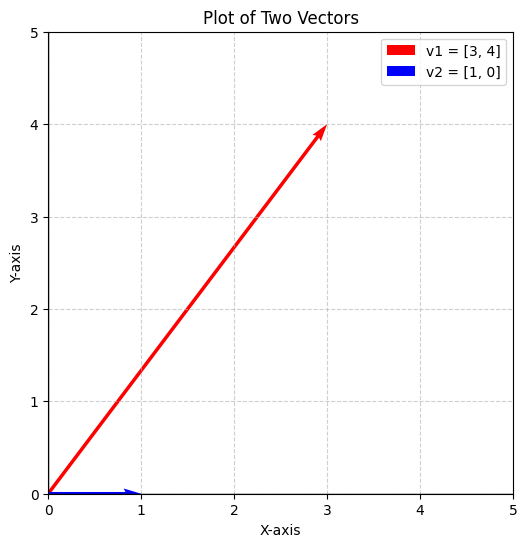

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the vectors
v1 = np.array([3, 4])
v2 = np.array([1, 0])

# Create a new figure
plt.figure(figsize=(6, 6))
ax = plt.gca()

# Plot the vectors from the origin
ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1 = [3, 4]')
ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2 = [1, 0]')

# Set the limits
plt.xlim(0, 5)
plt.ylim(0, 5)

# Add grid, axis lines, and labels
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.title('Plot of Two Vectors')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()


In [12]:
import math

def angle_between(v1, v2):
    """Compute the angle (in degrees) between two vectors using the cosine inverse formula."""
    
    # Dot product
    dot_product = sum(a * b for a, b in zip(v1, v2))
    
    # Magnitudes
    mag_v1 = math.sqrt(sum(a ** 2 for a in v1))
    mag_v2 = math.sqrt(sum(b ** 2 for b in v2))
    
    # Avoid division by zero
    if mag_v1 == 0 or mag_v2 == 0:
        raise ValueError("One of the vectors has zero magnitude.")
    
    # Cosine of angle
    cos_theta = dot_product / (mag_v1 * mag_v2)
    
    # Clamp to handle floating-point rounding errors
    cos_theta = max(-1, min(1, cos_theta))
    
    # Angle in radians
    theta_rad = math.acos(cos_theta)
    
    # Convert to degrees
    theta_deg = math.degrees(theta_rad)
    
    return theta_deg


In [13]:
# Problem 1 

p = [3, 4]
q = [1, 0]

angle = angle_between(p, q)

print(f"Angle (3-4-5 vector, x-axis): {angle :.2f} degrees")


Angle (3-4-5 vector, x-axis): 53.13 degrees


In [14]:
# Problem 1 

m = [1, 2, 3]
n = [4, 1, 5]

angle = angle_between(m, n)
print(f"Angle (3-4-5 vector, x-axis): {angle :.2f} degrees")


Angle (3-4-5 vector, x-axis): 30.00 degrees


## SECTION 2: THE GRAM-SCHMIDT PROCESS

**Concept: Gram-Schmidt Orthogonalization**

The Gram-Schmidt process is an algorithm that takes a set of linearly independent vectors and converts them into an **orthogonal** (or **orthonormal**) set of vectors.

**Why is this useful?**
- Orthogonal bases make calculations much simpler
- Used in QR decomposition, solving least squares problems
- Foundation for many ML algorithms (PCA, for example)


### 2.1 The Algorithm - Step by Step

Given vectors **v₁, v₂, v₃, ...**, we create orthogonal vectors **e₁, e₂, e₃, ...**:

**Step 1:** The first vector stays the same:
$$
\mathbf{e}_1 = \mathbf{v}_1
$$

**Step 2:** For the second vector, remove its projection onto **e₁**:
$$
\mathbf{e}_2 = \mathbf{v}_2 - \text{proj}_{\mathbf{e}_1}(\mathbf{v}_2)
$$

**Step 3:** For the third vector, remove its projections onto **e₁** and **e₂**:
$$
\mathbf{e}_3 = \mathbf{v}_3 - \text{proj}_{\mathbf{e}_1}(\mathbf{v}_3) - \text{proj}_{\mathbf{e}_2}(\mathbf{v}_3)
$$

And so on...

In [15]:
# Implementing Gram-Schmidt

def gram_schmidt(vectors):
    """
    Apply Gram-Schmidt orthogonalization to a list of vectors
    Returns: list of orthogonal vectors
    """
    # Start with empty list for orthogonal vectors
    orthogonal = []
    
    for v in vectors:
        # Start with the current vector
        e = v.copy()
        
        # Subtract projections onto all previous orthogonal vectors
        for orth_vec in orthogonal:
            # Calculate projection
            proj = project_onto(e, orth_vec)
            
            # Subtract projection from current vector
            e = [e[i] - proj[i] for i in range(len(e))]
        
        # Add the new orthogonal vector to our list
        orthogonal.append(e)
    
    return orthogonal

In [16]:
# Example 
v1 = [1.0, 1.0]
v2 = [1.0, 0.0]
v3 = [2.0, 3.0]

vectors = [v1, v2, v3]
orthogonal = gram_schmidt(vectors)

print("Original vectors:")
for i, v in enumerate(vectors):
    print(f"  v{i+1} = {v}")

print("\nOrthogonal vectors:")
for i, e in enumerate(orthogonal):
    print(f"  e{i+1} = {e}")

# Verify orthogonality (dot product should be ~0)
print(f"\nDot product e1·e2 = {dot_product(orthogonal[0], orthogonal[1]):.6f}")

Original vectors:
  v1 = [1.0, 1.0]
  v2 = [1.0, 0.0]
  v3 = [2.0, 3.0]

Orthogonal vectors:
  e1 = [1.0, 1.0]
  e2 = [0.5, -0.5]
  e3 = [0.0, 0.0]

Dot product e1·e2 = 0.000000


#### 2.3 Creating an Orthonormal Basis

To make the basis **orthonormal** (orthogonal + unit length), we simply normalize each vector:


In [17]:
def normalize(v):
    """Convert vector to unit length"""
    import math
    length = math.sqrt(sum(x**2 for x in v))
    return [x / length for x in v]

def gram_schmidt_orthonormal(vectors):
    """
    Apply Gram-Schmidt and normalize to create orthonormal basis
    """
    # First, get orthogonal vectors
    orthogonal = gram_schmidt(vectors)
    
    # Then normalize each one
    orthonormal = [normalize(e) for e in orthogonal]
    
    return orthonormal

In [18]:
# Example
v1 = [1.0, 1.0]
v2 = [1.0, 0.0]

vectors = [v1, v2]
orthonormal = gram_schmidt_orthonormal(vectors)

print("Orthonormal basis:")
for i, u in enumerate(orthonormal):
    print(f"  u{i+1} = {u}")
    
    # Calculate and print length
    length = sum(x**2 for x in u)**0.5
    print(f"       Length = {length:.4f}")

Orthonormal basis:
  u1 = [0.7071067811865475, 0.7071067811865475]
       Length = 1.0000
  u2 = [0.7071067811865475, -0.7071067811865475]
       Length = 1.0000


In [19]:
# Using NumPy
import numpy as np

def gram_schmidt_numpy(vectors):
    """
    Gram-Schmidt process using NumPy
    Returns orthonormal basis
    """
    vectors = [np.array(v, dtype=float) for v in vectors]
    orthonormal = []
    
    for v in vectors:
        # Start with current vector
        u = v.copy()
        
        # Subtract projections onto all previous orthonormal vectors
        for prev_u in orthonormal:
            u = u - np.dot(v, prev_u) * prev_u
        
        # Normalize to unit length
        u = u / np.linalg.norm(u)
        
        orthonormal.append(u)
    
    return orthonormal

In [20]:
# Example 2
v1 = [1, 1]
v2 = [1, 0]
v3 = [0, 1]

vectors = [v1, v2, v3]
orthonormal = gram_schmidt_numpy(vectors)

print("Orthonormal basis using NumPy:")
for i, u in enumerate(orthonormal):
    print(f"  u{i+1} = {u}")

Orthonormal basis using NumPy:
  u1 = [0.70710678 0.70710678]
  u2 = [ 0.70710678 -0.70710678]
  u3 = [0.31622777 0.9486833 ]


#### 2.5 Example from Lecture Slides

Let's work through the example from the slides:

In [21]:
import numpy as np

# Vectors from lecture
v1 = np.array([1.0, 2.0, -2.0])
v2 = np.array([3.0, 6.0, 6.0])
v3 = np.array([3.0, 1.0, 1.0])

vectors = [v1, v2, v3]

print("Original vectors:")
for i, v in enumerate(vectors):
    print(f"  v{i+1} = {v}")

# Apply Gram-Schmidt
orthonormal = gram_schmidt_numpy(vectors)

print("\nOrthonormal basis:")
for i, u in enumerate(orthonormal):
    print(f"  u{i+1} = {u}")
    print(f"       ||u{i+1}|| = {np.linalg.norm(u):.4f}")

# Verify orthogonality
print("\nVerifying orthogonality (dot products should be ~0):")
for i in range(len(orthonormal)):
    for j in range(i+1, len(orthonormal)):
        dot_prod = np.dot(orthonormal[i], orthonormal[j])
        print(f"  u{i+1}·u{j+1} = {dot_prod:.4f}")

Original vectors:
  v1 = [ 1.  2. -2.]
  v2 = [3. 6. 6.]
  v3 = [3. 1. 1.]

Orthonormal basis:
  u1 = [ 0.33333333  0.66666667 -0.66666667]
       ||u1|| = 1.0000
  u2 = [0.2981424  0.59628479 0.74535599]
       ||u2|| = 1.0000
  u3 = [ 0.89442719 -0.4472136   0.        ]
       ||u3|| = 1.0000

Verifying orthogonality (dot products should be ~0):
  u1·u2 = -0.0000
  u1·u3 = 0.0000
  u2·u3 = 0.0000


#### 2.6 What if Vectors are Linearly Dependent?

As mentioned in the lecture, if we apply Gram-Schmidt to linearly dependent vectors, we'll get a zero vector in the output!

In [22]:
def gram_schmidt_with_check(vectors):
    """
    Gram-Schmidt with check for linear dependence
    """
    orthogonal = []
    
    for i, v in enumerate(vectors):
        e = v.copy()
        
        # Subtract projections
        for orth_vec in orthogonal:
            proj = project_onto(e, orth_vec)
            e = [e[j] - proj[j] for j in range(len(e))]
        
        # Check if result is zero vector (linearly dependent)
        length = sum(x**2 for x in e)**0.5
        
        if length < 1e-10:  # essentially zero
            print(f"Warning: v{i+1} is linearly dependent on previous vectors!")
            continue
        
        orthogonal.append(e)
    
    return orthogonal

In [23]:
# Example with linearly dependent vectors
v1 = [1.0, 0.0]
v2 = [2.0, 0.0]  # v2 = 2*v1, so linearly dependent!
v3 = [0.0, 1.0]

vectors = [v1, v2, v3]
result = gram_schmidt_with_check(vectors)

print("\nResulting orthogonal vectors:")
for i, e in enumerate(result):
    print(f"  e{i+1} = {e}")


Resulting orthogonal vectors:
  e1 = [1.0, 0.0]
  e2 = [0.0, 1.0]


### Mini Exercises - Gram-Schmidt

**Exercise A:**  
Apply the Gram-Schmidt process to the following vectors:
- **v₁ = [1, 1, 0]**
- **v₂ = [1, 0, 1]**
- **v₃ = [0, 1, 1]**

Create an **orthonormal** basis.

**Exercise B:**  
Verify that your resulting vectors are:
1. Orthogonal to each other (dot products = 0)
2. Unit length (norm = 1)

**Exercise C (Challenge):**  
Write a function that takes a set of vectors and determines if they are linearly independent by attempting Gram-Schmidt. Return `True` if independent, `False` otherwise.

## Movie Recommendation


We will calculate the cosine similarity between movies $\vec{a}$, $\vec{b}$, and $\vec{c}$ using only pure Python to understand the mechanics.

**The Goal:**
* **Jessica's Liked Movie:** $\vec{a} = \binom{1}{3}$
* **Candidate Movie 1:** $\vec{b} = \binom{4}{2}$
* **Candidate Movie 2:** $\vec{c} = \binom{2}{3}$

We want to find out: is $\vec{b}$ or $\vec{c}$ more similar to $\vec{a}$?

#### Define our movie vectors


In [24]:
a = [1, 3]
b = [4, 2]
c = [2, 3]

print(f"Movie a (Jessica's preference): {a}")
print(f"Candidate Movie 1: {b}")
print(f"Candidate Movie 2: {c}")


Movie a (Jessica's preference): [1, 3]
Candidate Movie 1: [4, 2]
Candidate Movie 2: [2, 3]


To calculate $\cos(x, y) = \frac{\langle x, y \rangle}{||x|| \cdot ||y||}$, we need three helper functions:

1.  An `inner_product()` function for the numerator $\langle x, y \rangle$.
2.  A `magnitude()` function for the denominator $||x||$.
3.  A `cosine_similarity()` function that combines them.


#### Helper Functions

In [25]:
import math

def inner_product(v1, v2):
    """Calculates the inner product (dot product) of two vectors."""
    
    # Ensure the vectors are the same length
    if len(v1) != len(v2):
        print("Error: Vectors must be the same length")
        return None
    
    sum_of_products = 0

    
    for i in range(len(v1)):
        sum_of_products += v1[i] * v2[i]
        
    return sum_of_products

#Example
print(f"Inner product of a and b: {inner_product(a, b)}")
print(f"Inner product of a and c: {inner_product(a, c)}")

Inner product of a and b: 10
Inner product of a and c: 11


In [37]:
import math
def magnitude(v):
    for i, v_v in enumerate(v):
        v_values= []
        v_value= (np.sum(v_v**2))**(1/2)
        v_values.append(v_value)
        print(f'v{i}= v_v')
    return np.array(v_values)

def cosine_similarity(v1, v2):
    """Calculates the cosine similarity between two vectors."""
    
    #  Calculate the numerator (inner product)
    numerator = inner_product(v1, v2)
    
    # Calculate the denominator (product of magnitudes)
    mag_v1 = magnitude(v1)
    mag_v2 = magnitude(v2)
    denominator = mag_v1 * mag_v2
    
    # Divide (and handle the edge case of a zero-magnitude vector)
    if denominator == 0:
        return 0  # No similarity if one vector is zero
    
    return numerator / denominator

#### Final Calculations

In [36]:
sim_a_b = cosine_similarity(a, b)
sim_a_c = cosine_similarity(a, c)

print(f"Cosine Similarity (a, b) = {sim_a_b:.4f}")
print(f"Cosine Similarity (a, c) = {sim_a_c:.4f}")

TypeError: unsupported format string passed to numpy.ndarray.__format__


#### Conclusion

As we can see from our calculations:

  * The similarity between movie $\vec{a}$ and movie $\vec{b}$ is **0.7071**.
  * The similarity between movie $\vec{a}$ and movie $\vec{c}$ is **0.9648**.

Since $0.9648 > 0.7071$, movie $\vec{c}$ is significantly more similar to movie $\vec{a}$ (Jessica's liked movie).

**Therefore, we recommend movie $\vec{c}$**.



**What we learned:**

1. **Orthogonal Projection:**
   - Projects one vector onto another
   - Formula: proj_y(v) = (<v,y> / <y,y>) * y
   - Used to decompose vectors into parallel and perpendicular components

2. **Gram-Schmidt Process:**
   - Converts any basis into an orthogonal/orthonormal basis
   - Works iteratively: each new vector has all projections removed
   - Fails (produces zero) when vectors are linearly dependent
   - Extremely useful in numerical linear algebra and ML

**Key takeaways:**

- Orthogonal bases simplify many calculations
- Projection is fundamental to understanding vector relationships
- Gram-Schmidt is a practical algorithm used in real applications